In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_manipulated.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(209676, 12)


In [42]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(204187, 12)


dataset size:  (204187, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  29.03  +/-  8.24
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.3  +/-  88.7  pixels
Mean Y location:  469.4  +/-  64.7  pixels
Mean saccade  amplitude:  106.4  +/-  16.6  pixels
Mean scanpath  length:  2596.6  +/-  494.9  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  29.03  +/-  8.24
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  482.3  +/-  88.7  pixels
Mean Y location:  469.4  +/-  64.7  pixels
Mean saccade  amplitude:  106.4  +/-  16.6  pixels
Mean scanpath  length:  2596.6  +/-  494.9  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

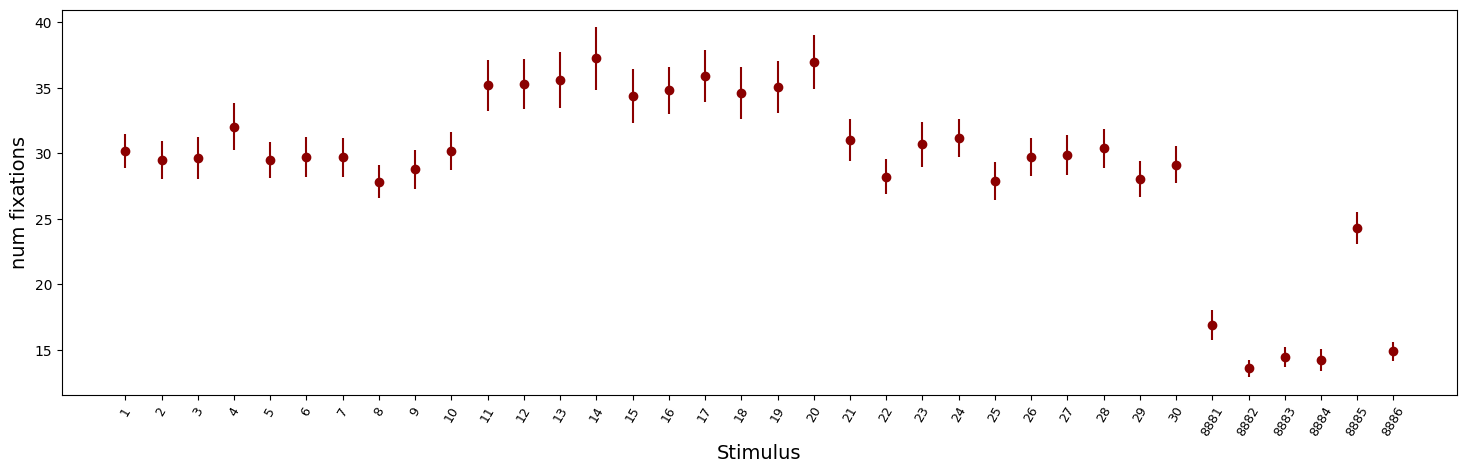

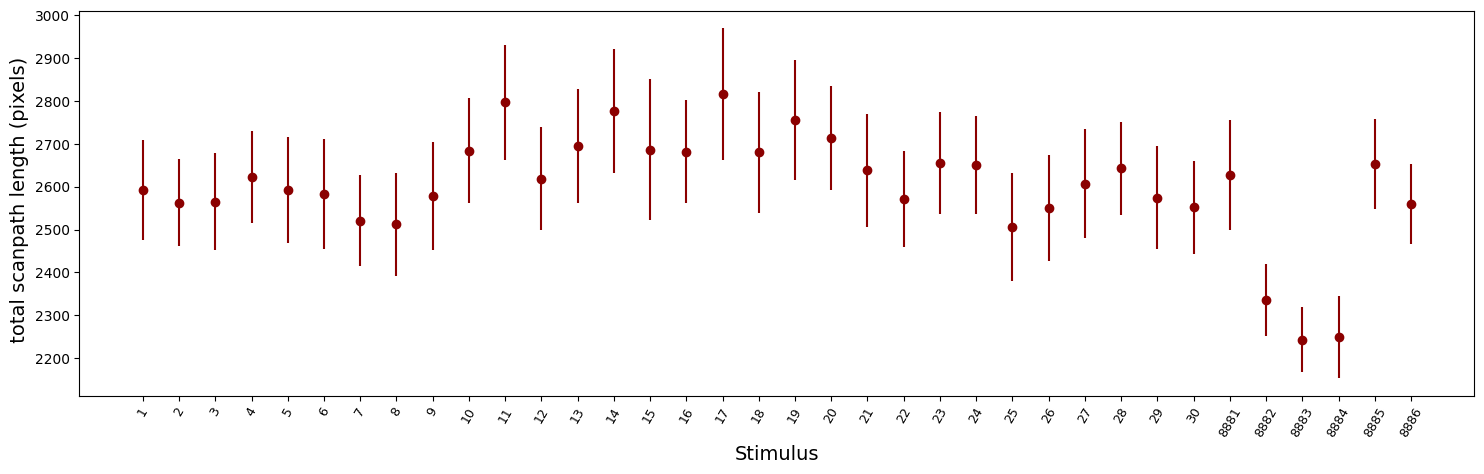

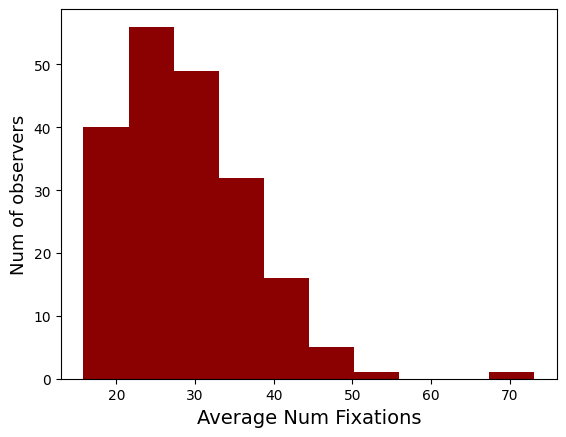

In [43]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [44]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

3 Stimuli with complete data: [7, 32, 33]
33 Stimuli with Missing data: {0: 1, 1: 3, 2: 3, 3: 1, 4: 4, 5: 3, 6: 4, 8: 1, 9: 7, 10: 6, 11: 7, 12: 3, 13: 2, 14: 4, 15: 4, 16: 6, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 7, 23: 4, 24: 4, 25: 3, 26: 2, 27: 5, 28: 5, 29: 3, 30: 5, 31: 6, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
57 Subjects with missing data: {177: 1, 127: 1, 160: 1, 181: 1, 161: 1, 199: 1, 121: 1, 173: 1, 198: 1, 158: 1, 167: 1, 196: 1, 142: 1, 146: 1, 182: 1, 119: 1, 120: 1, 124: 1, 136: 1, 147: 1, 130: 1, 139: 1, 153: 1, 166: 1, 191: 1, 184: 1, 171: 1, 149: 1, 154: 1, 169: 1, 197: 1, 155: 1, 163: 1, 150: 1, 179: 1, 186: 1, 128: 1, 125: 1, 152: 1, 176: 1, 133: 1, 138: 1, 162: 1, 188: 1, 134: 1, 164: 1, 141: 1, 165: 1, 195: 1, 122: 1, 123: 1, 126: 1, 137: 1, 185: 1, 145: 1, 159: 1, 178: 1}


In [45]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

27 Subjects with missing data for the first 10 stimuli
36 Subjects with missing data for the stimuli from 11 to 20 stimuli
35 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [46]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [47]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [48]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [49]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [50]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [51]:
list(set_subj)

[128,
 130,
 133,
 134,
 136,
 137,
 138,
 139,
 141,
 142,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 171,
 173,
 176,
 177,
 178,
 179,
 181,
 182,
 184,
 185,
 186,
 188,
 191,
 195,
 196,
 197,
 198,
 199,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [52]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [53]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [54]:
stimuli = list(range(0, 30))

In [55]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [56]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [57]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='peak180', match=True, Thr=0)

In [58]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [59]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [60]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(100):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(MunichSubs_Idx), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [61]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

100
30
74
9


In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [63]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [64]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [65]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(100):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

In [66]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [67]:
import re


torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6142957806587219
Epoch 5 loss: 0.5376222133636475
Epoch 10 loss: 0.43909212946891785
Epoch 15 loss: 0.38776418566703796
Epoch 0 loss: 0.6429007649421692
Epoch 5 loss: 0.4746883511543274
Epoch 10 loss: 0.3945430517196655
Epoch 15 loss: 0.39033252000808716
Epoch 0 loss: 0.6744439005851746
Epoch 5 loss: 0.5281089544296265
Epoch 10 loss: 0.4457135498523712
Epoch 15 loss: 0.405621200799942
Epoch 0 loss: 0.6771966218948364
Epoch 5 loss: 0.5037832260131836
Epoch 10 loss: 0.4371652901172638
Epoch 15 loss: 0.40069425106048584
Epoch 0 loss: 0.7431901693344116
Epoch 5 loss: 0.5919955372810364
Epoch 10 loss: 0.4558495283126831
Epoch 15 loss: 0.40475690364837646
Epoch 0 loss: 0.6756908297538757
Epoch 5 loss: 0.49009791016578674
Epoch 10 loss: 0.42325010895729065
Epoch 15 loss: 0.4009672999382019
Epoch 0 loss: 0.7243770360946655
Epoch 5 loss: 0.47929614782333374
Epoch 10 loss: 0.42141658067703247
Epoch 15 loss: 0.38145044445991516
Epoch 0 loss: 0.7886760830879211
E

Approximation Error: 9.735708590596914e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


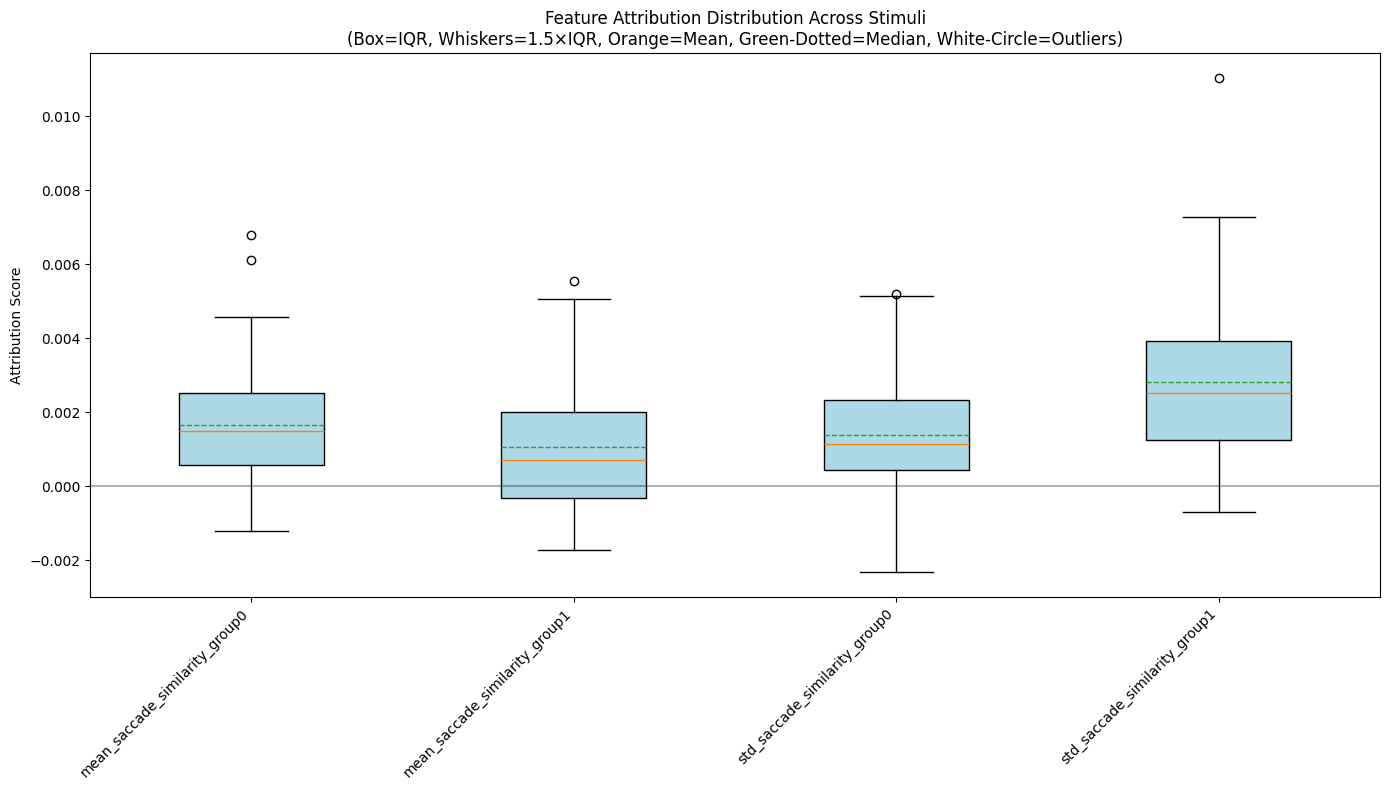


Feature Attribution Summary:
------------------------------------------------------------
mean_saccade_similarity_group0: Mean= 0.0016, Std= 0.0020, Min=-0.0012, Max= 0.0068
mean_saccade_similarity_group1: Mean= 0.0011, Std= 0.0019, Min=-0.0017, Max= 0.0055
std_saccade_similarity_group0 : Mean= 0.0014, Std= 0.0018, Min=-0.0023, Max= 0.0052
std_saccade_similarity_group1 : Mean= 0.0028, Std= 0.0025, Min=-0.0007, Max= 0.0110


In [68]:
feature_names = [
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original

In [69]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 7))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [70]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(210, 110)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(110, 55)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(55, 27) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(27, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6570966839790344
Epoch 5 loss: 0.42299532890319824
Epoch 10 loss: 0.36068102717399597
Epoch 15 loss: 0.31935152411460876
Epoch 0 loss: 0.6692467927932739
Epoch 5 loss: 0.43564462661743164
Epoch 10 loss: 0.35807526111602783
Epoch 15 loss: 0.3324457108974457
Epoch 0 loss: 0.675797700881958
Epoch 5 loss: 0.38768720626831055
Epoch 10 loss: 0.33467406034469604
Epoch 15 loss: 0.33493006229400635
Epoch 0 loss: 0.8990107178688049
Epoch 5 loss: 0.44111168384552
Epoch 10 loss: 0.3425511121749878
Epoch 15 loss: 0.3408478796482086
Epoch 0 loss: 0.7312192320823669
Epoch 5 loss: 0.4088554382324219
Epoch 10 loss: 0.3580407500267029
Epoch 15 loss: 0.35262736678123474
Epoch 0 loss: 0.743787944316864
Epoch 5 loss: 0.45208635926246643
Epoch 10 loss: 0.3677438199520111
Epoch 15 loss: 0.3366585373878479
Epoch 0 loss: 0.7338303923606873
Epoch 5 loss: 0.40783506631851196
Epoch 10 loss: 0.3516438603401184
Epoch 15 loss: 0.34794846177101135
Epoch 0 loss: 0.6482422947883606
Ep

In [71]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6570966839790344
Epoch 5 loss: 0.4643813967704773
Epoch 10 loss: 0.39577242732048035
Epoch 15 loss: 0.3458575904369354
Epoch 0 loss: 0.6692467927932739
Epoch 5 loss: 0.46445438265800476
Epoch 10 loss: 0.38360029458999634
Epoch 15 loss: 0.35545969009399414
Epoch 0 loss: 0.675797700881958
Epoch 5 loss: 0.4118492901325226
Epoch 10 loss: 0.3657311499118805
Epoch 15 loss: 0.35038134455680847
Epoch 0 loss: 0.8990107178688049
Epoch 5 loss: 0.454616904258728
Epoch 10 loss: 0.356501966714859
Epoch 15 loss: 0.34723377227783203
Epoch 0 loss: 0.7312192320823669
Epoch 5 loss: 0.427791029214859
Epoch 10 loss: 0.37066763639450073
Epoch 15 loss: 0.3653319478034973
Epoch 0 loss: 0.743787944316864
Epoch 5 loss: 0.46009156107902527
Epoch 10 loss: 0.3918732702732086
Epoch 15 loss: 0.3737647533416748
Epoch 0 loss: 0.7338303923606873
Epoch 5 loss: 0.41140055656433105
Epoch 10 loss: 0.37180042266845703
Epoch 15 loss: 0.36450034379959106
Epoch 0 loss: 0.6482422947883606
Epoc

Approximation Error: -9.528086957288906e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


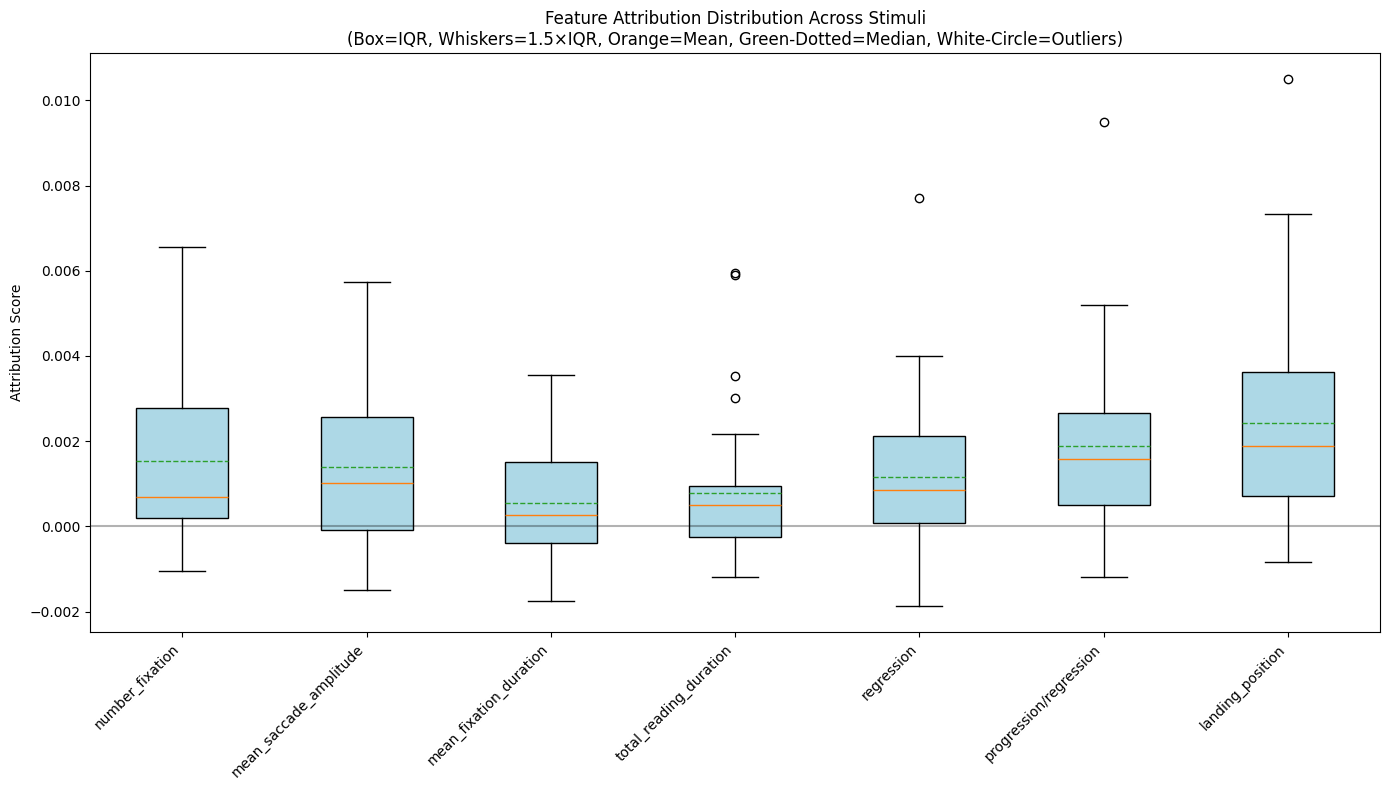


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0020, Min=-0.0010, Max= 0.0066
mean_saccade_amplitude        : Mean= 0.0014, Std= 0.0018, Min=-0.0015, Max= 0.0057
mean_fixation_duration        : Mean= 0.0006, Std= 0.0014, Min=-0.0018, Max= 0.0036
total_reading_duration        : Mean= 0.0008, Std= 0.0017, Min=-0.0012, Max= 0.0059
regression                    : Mean= 0.0012, Std= 0.0018, Min=-0.0019, Max= 0.0077
progression/regression        : Mean= 0.0019, Std= 0.0021, Min=-0.0012, Max= 0.0095
landing_position              : Mean= 0.0024, Std= 0.0025, Min=-0.0008, Max= 0.0105


In [72]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original (without mean saccade amplitude)

In [73]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [74]:
# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(180, 90)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(90, 45)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(45, 23) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(23, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8046795725822449
Epoch 5 loss: 0.5169711112976074
Epoch 10 loss: 0.40263721346855164
Epoch 15 loss: 0.3486357033252716
Epoch 0 loss: 0.7334440350532532
Epoch 5 loss: 0.4872967600822449
Epoch 10 loss: 0.3691968023777008
Epoch 15 loss: 0.3492368757724762
Epoch 0 loss: 0.7800813913345337
Epoch 5 loss: 0.4319976568222046
Epoch 10 loss: 0.3588433265686035
Epoch 15 loss: 0.3347432017326355
Epoch 0 loss: 0.6857710480690002
Epoch 5 loss: 0.46370646357536316
Epoch 10 loss: 0.37983524799346924
Epoch 15 loss: 0.3548644185066223
Epoch 0 loss: 0.7956203818321228
Epoch 5 loss: 0.4633823037147522
Epoch 10 loss: 0.36384496092796326
Epoch 15 loss: 0.36374884843826294
Epoch 0 loss: 0.638066291809082
Epoch 5 loss: 0.5509820580482483
Epoch 10 loss: 0.37709030508995056
Epoch 15 loss: 0.35808858275413513
Epoch 0 loss: 0.8983983397483826
Epoch 5 loss: 0.5110061168670654
Epoch 10 loss: 0.3723878562450409
Epoch 15 loss: 0.3367500305175781
Epoch 0 loss: 0.7260723114013672
Epoc

In [75]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8046795725822449
Epoch 5 loss: 0.526005744934082
Epoch 10 loss: 0.43707337975502014
Epoch 15 loss: 0.3560900092124939
Epoch 0 loss: 0.7334440350532532
Epoch 5 loss: 0.5193549394607544
Epoch 10 loss: 0.4250625967979431
Epoch 15 loss: 0.3761310577392578
Epoch 0 loss: 0.7800813913345337
Epoch 5 loss: 0.449631929397583
Epoch 10 loss: 0.367661714553833
Epoch 15 loss: 0.35184597969055176
Epoch 0 loss: 0.6857710480690002
Epoch 5 loss: 0.47433462738990784
Epoch 10 loss: 0.4200868010520935
Epoch 15 loss: 0.3785838186740875
Epoch 0 loss: 0.7956203818321228
Epoch 5 loss: 0.4859645962715149
Epoch 10 loss: 0.3911604583263397
Epoch 15 loss: 0.38437747955322266
Epoch 0 loss: 0.638066291809082
Epoch 5 loss: 0.5675339698791504
Epoch 10 loss: 0.4147072434425354
Epoch 15 loss: 0.3917720913887024
Epoch 0 loss: 0.8983983397483826
Epoch 5 loss: 0.5109975934028625
Epoch 10 loss: 0.4024018347263336
Epoch 15 loss: 0.3584698736667633
Epoch 0 loss: 0.7260723114013672
Epoch 5 lo

Approximation Error: -0.0003377922694198787 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


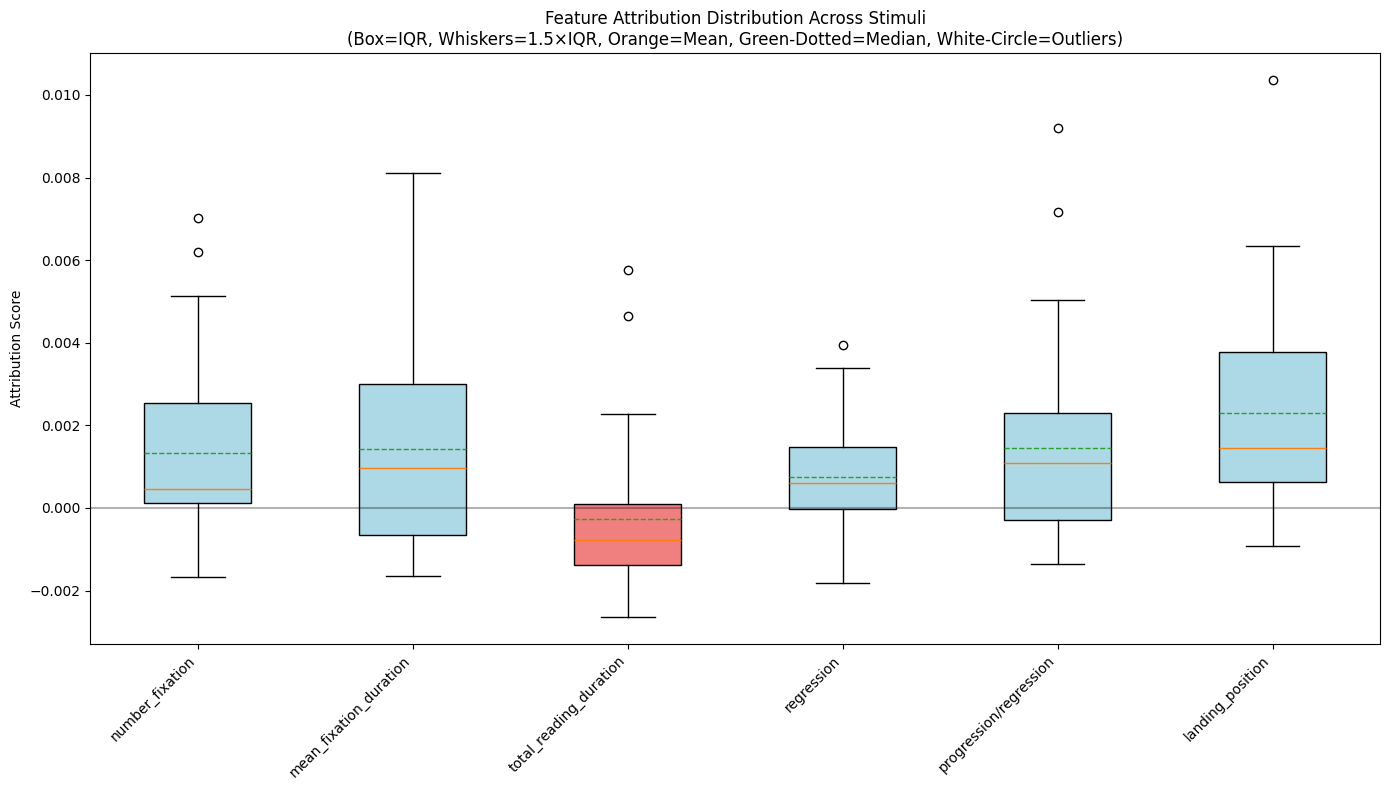


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0013, Std= 0.0022, Min=-0.0017, Max= 0.0070
mean_fixation_duration        : Mean= 0.0014, Std= 0.0024, Min=-0.0016, Max= 0.0081
total_reading_duration        : Mean=-0.0003, Std= 0.0018, Min=-0.0026, Max= 0.0058
regression                    : Mean= 0.0008, Std= 0.0014, Min=-0.0018, Max= 0.0040
progression/regression        : Mean= 0.0015, Std= 0.0024, Min=-0.0014, Max= 0.0092
landing_position              : Mean= 0.0023, Std= 0.0024, Min=-0.0009, Max= 0.0104


In [76]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original + Additional Features

In [77]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_saccade_amplitude']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [78]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.8381250500679016
Epoch 5 loss: 0.4222794473171234
Epoch 10 loss: 0.34496018290519714
Epoch 15 loss: 0.32745566964149475
Epoch 0 loss: 0.8498031497001648
Epoch 5 loss: 0.4441184103488922
Epoch 10 loss: 0.3473576605319977
Epoch 15 loss: 0.3381822407245636
Epoch 0 loss: 0.7331759929656982
Epoch 5 loss: 0.4110722541809082
Epoch 10 loss: 0.3324940800666809
Epoch 15 loss: 0.3292063772678375
Epoch 0 loss: 0.6089134216308594
Epoch 5 loss: 0.3848813474178314
Epoch 10 loss: 0.35474178194999695
Epoch 15 loss: 0.3282604217529297
Epoch 0 loss: 0.7189562916755676
Epoch 5 loss: 0.3624722361564636
Epoch 10 loss: 0.344136118888855
Epoch 15 loss: 0.32004398107528687
Epoch 0 loss: 0.6714631915092468
Epoch 5 loss: 0.39898955821990967
Epoch 10 loss: 0.34076210856437683
Epoch 15 loss: 0.3149356544017792
Epoch 0 loss: 0.7288975715637207
Epoch 5 loss: 0.41282692551612854
Epoch 10 loss: 0.34963104128837585
Epoch 15 loss: 0.32868996262550354
Epoch 0 loss: 0.6769466996192932
Ep

In [79]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.8381250500679016
Epoch 5 loss: 0.4437684118747711
Epoch 10 loss: 0.37948107719421387
Epoch 15 loss: 0.3339006304740906
Epoch 0 loss: 0.8498031497001648
Epoch 5 loss: 0.44751259684562683
Epoch 10 loss: 0.37136635184288025
Epoch 15 loss: 0.35773491859436035
Epoch 0 loss: 0.7331759929656982
Epoch 5 loss: 0.43840959668159485
Epoch 10 loss: 0.35443779826164246
Epoch 15 loss: 0.34227612614631653
Epoch 0 loss: 0.6089134216308594
Epoch 5 loss: 0.4106360673904419
Epoch 10 loss: 0.3637373745441437
Epoch 15 loss: 0.3268476724624634
Epoch 0 loss: 0.7189562916755676
Epoch 5 loss: 0.3777543008327484
Epoch 10 loss: 0.36782991886138916
Epoch 15 loss: 0.33866527676582336
Epoch 0 loss: 0.6714631915092468
Epoch 5 loss: 0.43308743834495544
Epoch 10 loss: 0.3612701892852783
Epoch 15 loss: 0.3320596516132355
Epoch 0 loss: 0.7288975715637207
Epoch 5 loss: 0.4480551779270172
Epoch 10 loss: 0.37829646468162537
Epoch 15 loss: 0.33123457431793213
Epoch 0 loss: 0.676946699619293

Approximation Error: -0.00019322038860991597 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


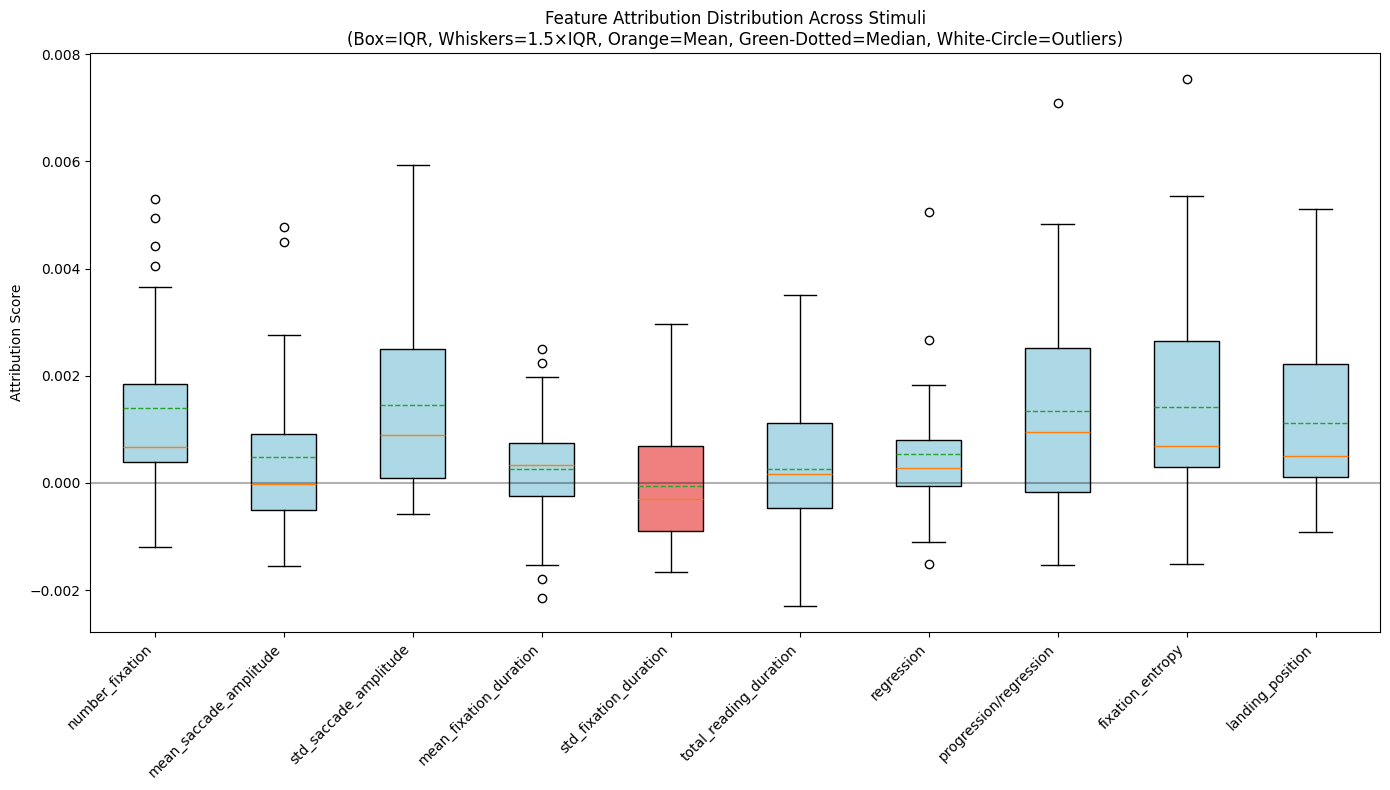


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0016, Min=-0.0012, Max= 0.0053
mean_saccade_amplitude        : Mean= 0.0005, Std= 0.0015, Min=-0.0016, Max= 0.0048
std_saccade_amplitude         : Mean= 0.0015, Std= 0.0017, Min=-0.0006, Max= 0.0059
mean_fixation_duration        : Mean= 0.0003, Std= 0.0011, Min=-0.0022, Max= 0.0025
std_fixation_duration         : Mean=-0.0001, Std= 0.0012, Min=-0.0017, Max= 0.0030
total_reading_duration        : Mean= 0.0003, Std= 0.0012, Min=-0.0023, Max= 0.0035
regression                    : Mean= 0.0005, Std= 0.0012, Min=-0.0015, Max= 0.0051
progression/regression        : Mean= 0.0013, Std= 0.0020, Min=-0.0015, Max= 0.0071
fixation_entropy              : Mean= 0.0014, Std= 0.0019, Min=-0.0015, Max= 0.0075
landing_position              : Mean= 0.0011, Std= 0.0014, Min=-0.0009, Max= 0.0051


In [80]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Similarity features (Avg and Std)

In [81]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [82]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [83]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7243298888206482
Epoch 5 loss: 0.3410700857639313
Epoch 10 loss: 0.3276456892490387
Epoch 15 loss: 0.3169170618057251
Epoch 0 loss: 0.7293400168418884
Epoch 5 loss: 0.39956429600715637
Epoch 10 loss: 0.3442457616329193
Epoch 15 loss: 0.32794642448425293
Epoch 0 loss: 0.710647463798523
Epoch 5 loss: 0.3786497116088867
Epoch 10 loss: 0.3337983787059784
Epoch 15 loss: 0.3175819516181946
Epoch 0 loss: 0.6769441366195679
Epoch 5 loss: 0.4262186586856842
Epoch 10 loss: 0.34196919202804565
Epoch 15 loss: 0.3322097659111023
Epoch 0 loss: 0.6770191788673401
Epoch 5 loss: 0.4402461647987366
Epoch 10 loss: 0.34049853682518005
Epoch 15 loss: 0.32602474093437195
Epoch 0 loss: 0.7827076315879822
Epoch 5 loss: 0.39621832966804504
Epoch 10 loss: 0.3450692594051361
Epoch 15 loss: 0.31699252128601074
Epoch 0 loss: 0.7275345325469971
Epoch 5 loss: 0.37779760360717773
Epoch 10 loss: 0.3428330421447754
Epoch 15 loss: 0.33217182755470276
Epoch 0 loss: 0.6545695066452026
Ep

In [84]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7243298888206482
Epoch 5 loss: 0.36272677779197693
Epoch 10 loss: 0.33996057510375977
Epoch 15 loss: 0.3253907263278961
Epoch 0 loss: 0.7293400168418884
Epoch 5 loss: 0.4194818139076233
Epoch 10 loss: 0.38183194398880005
Epoch 15 loss: 0.3405371606349945
Epoch 0 loss: 0.710647463798523
Epoch 5 loss: 0.4097191393375397
Epoch 10 loss: 0.3389292359352112
Epoch 15 loss: 0.3212541341781616
Epoch 0 loss: 0.6769441366195679
Epoch 5 loss: 0.45494717359542847
Epoch 10 loss: 0.3526354730129242
Epoch 15 loss: 0.34771671891212463
Epoch 0 loss: 0.6770191788673401
Epoch 5 loss: 0.46314331889152527
Epoch 10 loss: 0.34915876388549805
Epoch 15 loss: 0.3350203037261963
Epoch 0 loss: 0.7827076315879822
Epoch 5 loss: 0.4151727259159088
Epoch 10 loss: 0.3717460334300995
Epoch 15 loss: 0.3395146429538727
Epoch 0 loss: 0.7275345325469971
Epoch 5 loss: 0.40705326199531555
Epoch 10 loss: 0.3548075556755066
Epoch 15 loss: 0.34783655405044556
Epoch 0 loss: 0.6545695066452026
Ep

Approximation Error: -1.6818978110677563e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


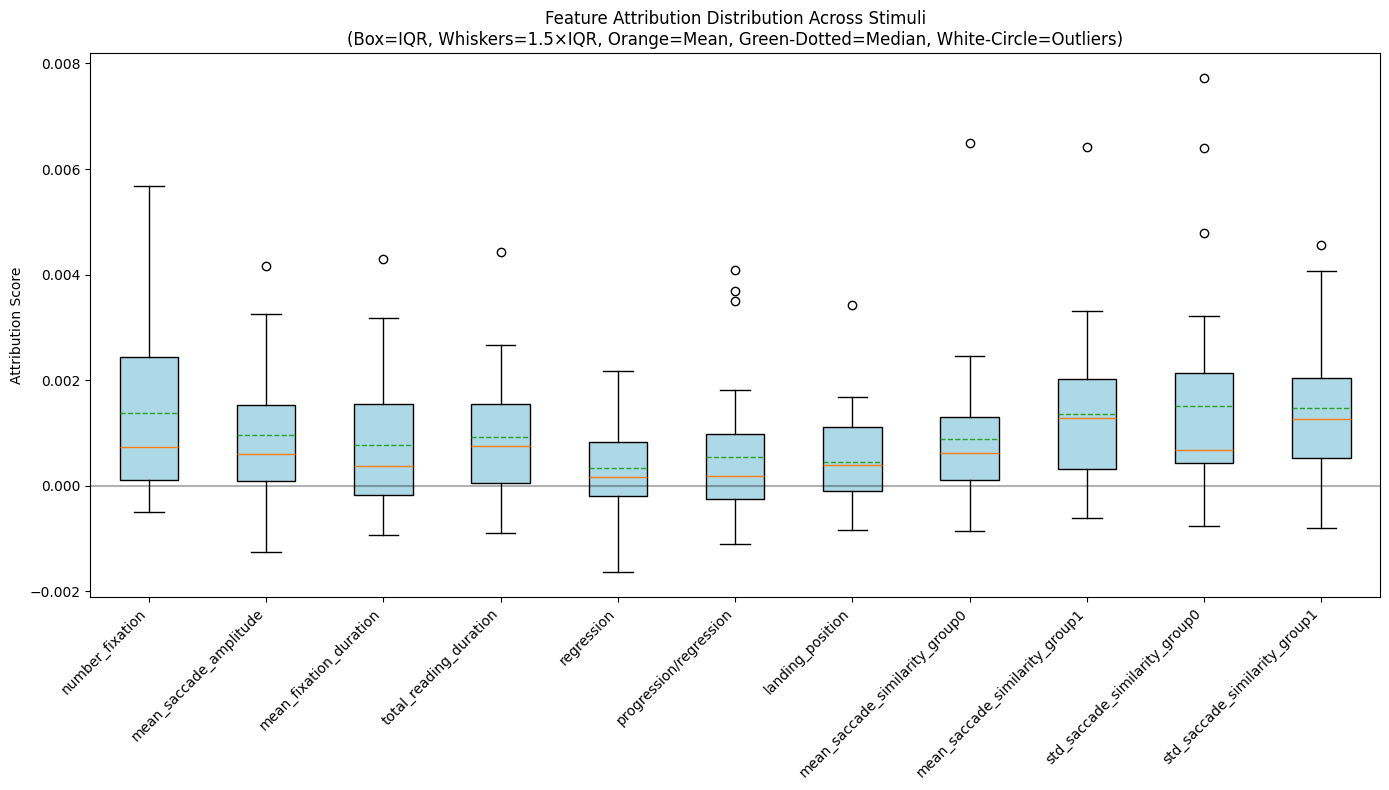


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0016, Min=-0.0005, Max= 0.0057
mean_saccade_amplitude        : Mean= 0.0010, Std= 0.0013, Min=-0.0013, Max= 0.0042
mean_fixation_duration        : Mean= 0.0008, Std= 0.0013, Min=-0.0009, Max= 0.0043
total_reading_duration        : Mean= 0.0009, Std= 0.0011, Min=-0.0009, Max= 0.0044
regression                    : Mean= 0.0003, Std= 0.0008, Min=-0.0016, Max= 0.0022
progression/regression        : Mean= 0.0005, Std= 0.0013, Min=-0.0011, Max= 0.0041
landing_position              : Mean= 0.0005, Std= 0.0009, Min=-0.0008, Max= 0.0034
mean_saccade_similarity_group0: Mean= 0.0009, Std= 0.0013, Min=-0.0009, Max= 0.0065
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0014, Min=-0.0006, Max= 0.0064
std_saccade_similarity_group0 : Mean= 0.0015, Std= 0.0019, Min=-0.0008, Max= 0.0077
std_saccade_similarity_group1 : Mean= 0.0015, Std= 0.0013, Min=-0.000

In [85]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Mean Similarity features

In [86]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [87]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.788892924785614
Epoch 5 loss: 0.5075409412384033
Epoch 10 loss: 0.3670348823070526
Epoch 15 loss: 0.33044156432151794
Epoch 0 loss: 0.6924264430999756
Epoch 5 loss: 0.4400913119316101
Epoch 10 loss: 0.34545373916625977
Epoch 15 loss: 0.3330550193786621
Epoch 0 loss: 0.638562798500061
Epoch 5 loss: 0.4084642827510834
Epoch 10 loss: 0.34143877029418945
Epoch 15 loss: 0.3301337659358978
Epoch 0 loss: 0.8027601838111877
Epoch 5 loss: 0.4255514144897461
Epoch 10 loss: 0.35558271408081055
Epoch 15 loss: 0.33736056089401245
Epoch 0 loss: 0.8722148537635803
Epoch 5 loss: 0.43340811133384705
Epoch 10 loss: 0.3564482033252716
Epoch 15 loss: 0.32992100715637207
Epoch 0 loss: 0.7549753785133362
Epoch 5 loss: 0.46933045983314514
Epoch 10 loss: 0.37461355328559875
Epoch 15 loss: 0.3247023820877075
Epoch 0 loss: 0.7113022804260254
Epoch 5 loss: 0.43969351053237915
Epoch 10 loss: 0.3439336121082306
Epoch 15 loss: 0.32152557373046875
Epoch 0 loss: 0.6694718599319458
E

In [88]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.788892924785614
Epoch 5 loss: 0.503694474697113
Epoch 10 loss: 0.3785860240459442
Epoch 15 loss: 0.33861708641052246
Epoch 0 loss: 0.6924264430999756
Epoch 5 loss: 0.4640158712863922
Epoch 10 loss: 0.36271294951438904
Epoch 15 loss: 0.3454737663269043
Epoch 0 loss: 0.638562798500061
Epoch 5 loss: 0.44113221764564514
Epoch 10 loss: 0.3783143162727356
Epoch 15 loss: 0.34851646423339844
Epoch 0 loss: 0.8027601838111877
Epoch 5 loss: 0.4531758427619934
Epoch 10 loss: 0.3860606849193573
Epoch 15 loss: 0.3424046039581299
Epoch 0 loss: 0.8722148537635803
Epoch 5 loss: 0.454263836145401
Epoch 10 loss: 0.36876145005226135
Epoch 15 loss: 0.3349721133708954
Epoch 0 loss: 0.7549753785133362
Epoch 5 loss: 0.49402469396591187
Epoch 10 loss: 0.4078119099140167
Epoch 15 loss: 0.34913650155067444
Epoch 0 loss: 0.7113022804260254
Epoch 5 loss: 0.45027902722358704
Epoch 10 loss: 0.3590163588523865
Epoch 15 loss: 0.33952972292900085
Epoch 0 loss: 0.6694718599319458
Epoch

Approximation Error: 0.0001544943224871531 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


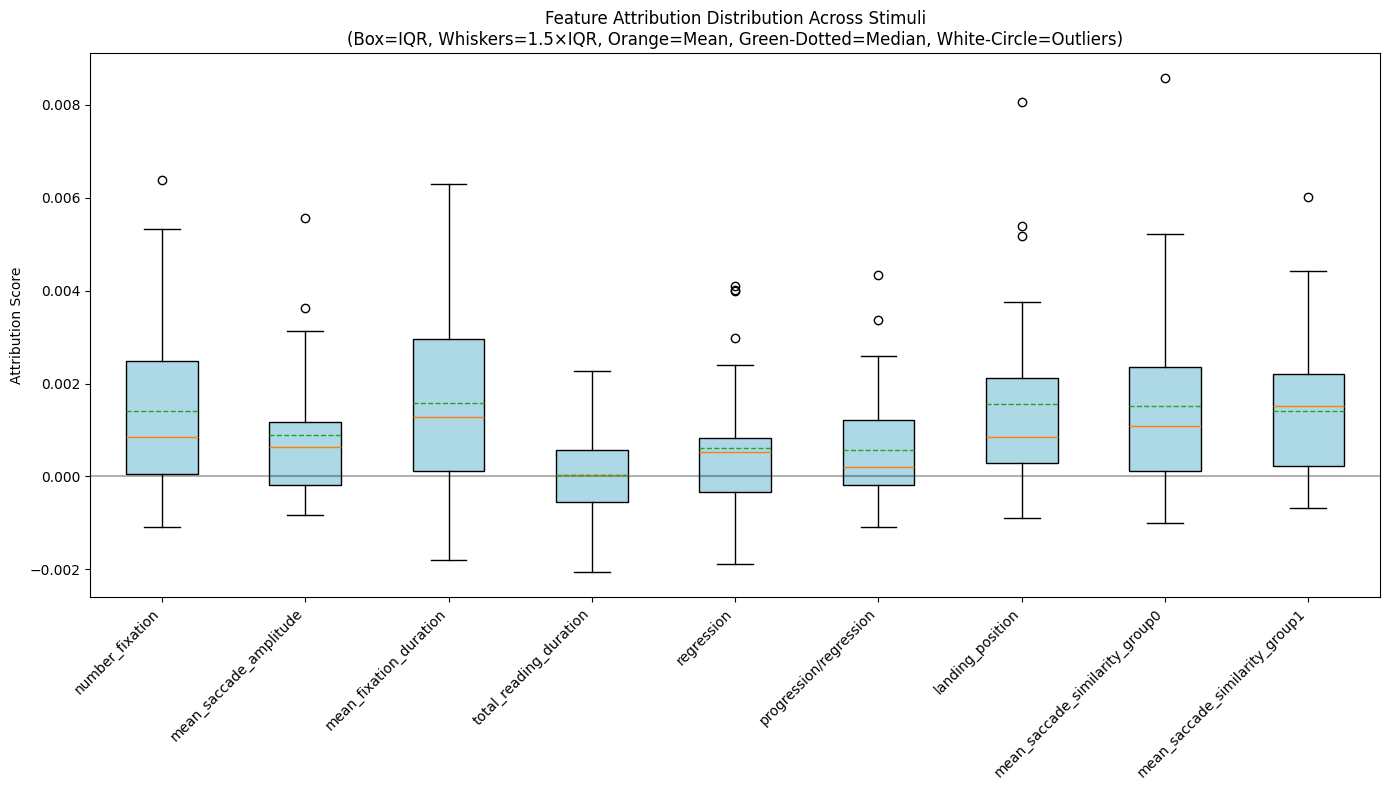


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0017, Min=-0.0011, Max= 0.0064
mean_saccade_amplitude        : Mean= 0.0009, Std= 0.0014, Min=-0.0008, Max= 0.0056
mean_fixation_duration        : Mean= 0.0016, Std= 0.0019, Min=-0.0018, Max= 0.0063
total_reading_duration        : Mean= 0.0000, Std= 0.0010, Min=-0.0021, Max= 0.0023
regression                    : Mean= 0.0006, Std= 0.0015, Min=-0.0019, Max= 0.0041
progression/regression        : Mean= 0.0006, Std= 0.0012, Min=-0.0011, Max= 0.0043
landing_position              : Mean= 0.0016, Std= 0.0019, Min=-0.0009, Max= 0.0081
mean_saccade_similarity_group0: Mean= 0.0015, Std= 0.0020, Min=-0.0010, Max= 0.0086
mean_saccade_similarity_group1: Mean= 0.0014, Std= 0.0015, Min=-0.0007, Max= 0.0060


In [89]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Mean Similarity features (without mean saccade amplitude)

In [90]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [91]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.682990550994873
Epoch 5 loss: 0.4620280861854553
Epoch 10 loss: 0.3686984181404114
Epoch 15 loss: 0.32614466547966003
Epoch 0 loss: 0.7356998324394226
Epoch 5 loss: 0.4335390627384186
Epoch 10 loss: 0.3442665934562683
Epoch 15 loss: 0.32023394107818604
Epoch 0 loss: 0.7133904695510864
Epoch 5 loss: 0.43410956859588623
Epoch 10 loss: 0.36250078678131104
Epoch 15 loss: 0.3284156918525696
Epoch 0 loss: 0.7138693332672119
Epoch 5 loss: 0.3791036903858185
Epoch 10 loss: 0.3517453372478485
Epoch 15 loss: 0.3305876553058624
Epoch 0 loss: 0.6749300956726074
Epoch 5 loss: 0.436900794506073
Epoch 10 loss: 0.4004752039909363
Epoch 15 loss: 0.3460168242454529
Epoch 0 loss: 0.7509015202522278
Epoch 5 loss: 0.4134592115879059
Epoch 10 loss: 0.3296142518520355
Epoch 15 loss: 0.3268383741378784
Epoch 0 loss: 0.8226836919784546
Epoch 5 loss: 0.4388275742530823
Epoch 10 loss: 0.3541313409805298
Epoch 15 loss: 0.33598795533180237
Epoch 0 loss: 0.809075653553009
Epoch 5 

In [92]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.682990550994873
Epoch 5 loss: 0.4716261923313141
Epoch 10 loss: 0.3818306624889374
Epoch 15 loss: 0.35545244812965393
Epoch 0 loss: 0.7356998324394226
Epoch 5 loss: 0.4488997459411621
Epoch 10 loss: 0.353339821100235
Epoch 15 loss: 0.34301263093948364
Epoch 0 loss: 0.7133904695510864
Epoch 5 loss: 0.4653867781162262
Epoch 10 loss: 0.3777400851249695
Epoch 15 loss: 0.35705748200416565
Epoch 0 loss: 0.7138693332672119
Epoch 5 loss: 0.400619775056839
Epoch 10 loss: 0.37795159220695496
Epoch 15 loss: 0.3383808135986328
Epoch 0 loss: 0.6749300956726074
Epoch 5 loss: 0.4628978967666626
Epoch 10 loss: 0.43390852212905884
Epoch 15 loss: 0.37029677629470825
Epoch 0 loss: 0.7509015202522278
Epoch 5 loss: 0.4487019181251526
Epoch 10 loss: 0.3564184904098511
Epoch 15 loss: 0.3509034812450409
Epoch 0 loss: 0.8226836919784546
Epoch 5 loss: 0.45054692029953003
Epoch 10 loss: 0.36590030789375305
Epoch 15 loss: 0.3558425307273865
Epoch 0 loss: 0.809075653553009
Epoch 

Approximation Error: -0.00012123565102228895 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


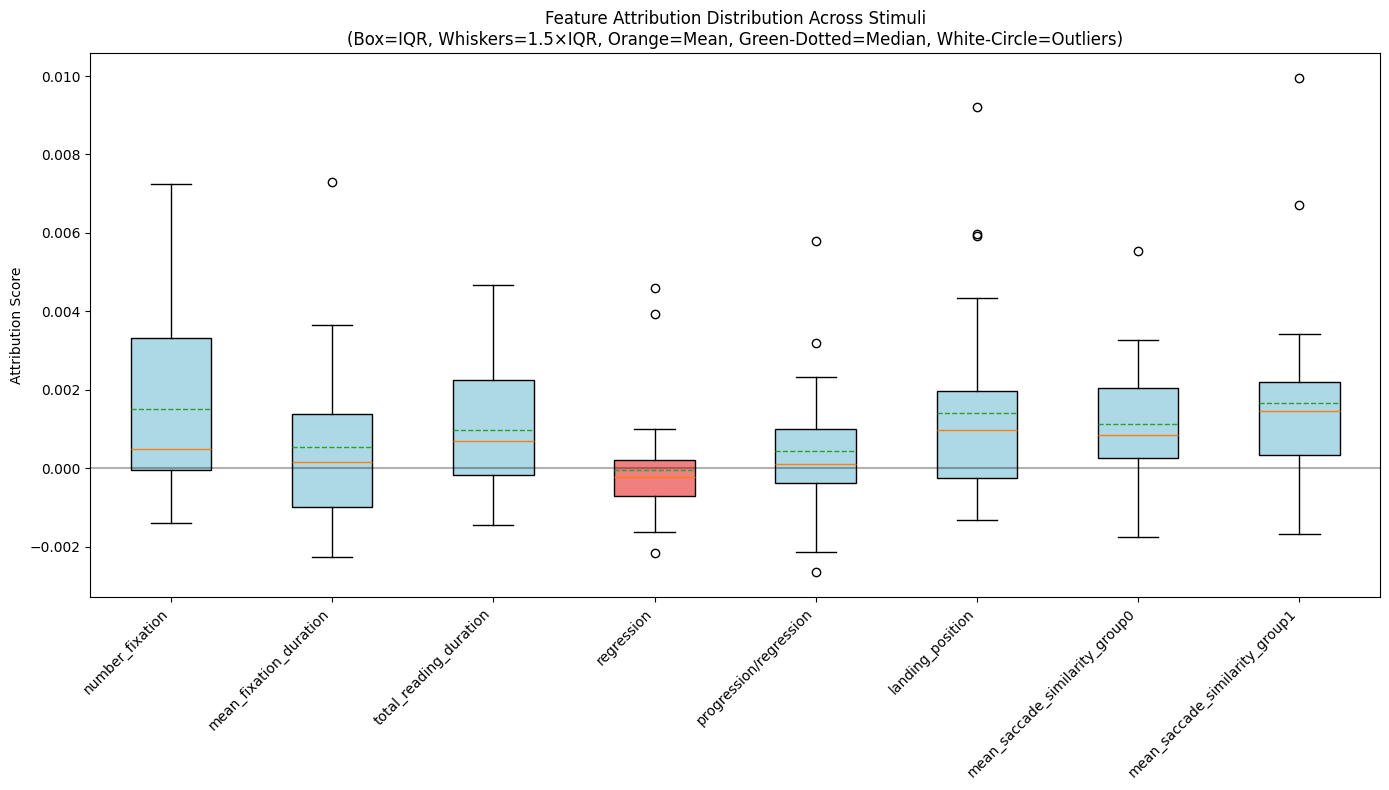


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0023, Min=-0.0014, Max= 0.0072
mean_fixation_duration        : Mean= 0.0005, Std= 0.0020, Min=-0.0023, Max= 0.0073
total_reading_duration        : Mean= 0.0010, Std= 0.0015, Min=-0.0015, Max= 0.0047
regression                    : Mean=-0.0000, Std= 0.0013, Min=-0.0022, Max= 0.0046
progression/regression        : Mean= 0.0004, Std= 0.0015, Min=-0.0027, Max= 0.0058
landing_position              : Mean= 0.0014, Std= 0.0024, Min=-0.0013, Max= 0.0092
mean_saccade_similarity_group0: Mean= 0.0011, Std= 0.0015, Min=-0.0018, Max= 0.0055
mean_saccade_similarity_group1: Mean= 0.0017, Std= 0.0022, Min=-0.0017, Max= 0.0100


In [93]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [94]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [95]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7770258188247681
Epoch 5 loss: 0.4486986994743347
Epoch 10 loss: 0.3550146222114563
Epoch 15 loss: 0.3373793661594391
Epoch 0 loss: 0.8347097635269165
Epoch 5 loss: 0.43327492475509644
Epoch 10 loss: 0.3775232136249542
Epoch 15 loss: 0.3512692451477051
Epoch 0 loss: 0.7335147261619568
Epoch 5 loss: 0.3961169719696045
Epoch 10 loss: 0.3409077823162079
Epoch 15 loss: 0.32619616389274597
Epoch 0 loss: 0.6091821789741516
Epoch 5 loss: 0.3896404206752777
Epoch 10 loss: 0.3500998616218567
Epoch 15 loss: 0.3220311105251312
Epoch 0 loss: 0.5996383428573608
Epoch 5 loss: 0.3925428092479706
Epoch 10 loss: 0.3380330502986908
Epoch 15 loss: 0.31491830945014954
Epoch 0 loss: 0.8159509301185608
Epoch 5 loss: 0.4318281412124634
Epoch 10 loss: 0.35657206177711487
Epoch 15 loss: 0.3387675881385803
Epoch 0 loss: 0.690168023109436
Epoch 5 loss: 0.40273675322532654
Epoch 10 loss: 0.3590570390224457
Epoch 15 loss: 0.33226388692855835
Epoch 0 loss: 0.6992413401603699
Epoch

In [96]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7770258188247681
Epoch 5 loss: 0.4677756130695343
Epoch 10 loss: 0.3928830921649933
Epoch 15 loss: 0.3511113226413727
Epoch 0 loss: 0.8347097635269165
Epoch 5 loss: 0.45578426122665405
Epoch 10 loss: 0.39050406217575073
Epoch 15 loss: 0.37131714820861816
Epoch 0 loss: 0.7335147261619568
Epoch 5 loss: 0.42552685737609863
Epoch 10 loss: 0.37449517846107483
Epoch 15 loss: 0.3348070979118347
Epoch 0 loss: 0.6091821789741516
Epoch 5 loss: 0.42451614141464233
Epoch 10 loss: 0.37454918026924133
Epoch 15 loss: 0.34054481983184814
Epoch 0 loss: 0.5996383428573608
Epoch 5 loss: 0.41848108172416687
Epoch 10 loss: 0.3476199209690094
Epoch 15 loss: 0.32622888684272766
Epoch 0 loss: 0.8159509301185608
Epoch 5 loss: 0.45131710171699524
Epoch 10 loss: 0.38180479407310486
Epoch 15 loss: 0.35716986656188965
Epoch 0 loss: 0.690168023109436
Epoch 5 loss: 0.42009374499320984
Epoch 10 loss: 0.38436436653137207
Epoch 15 loss: 0.3587392568588257
Epoch 0 loss: 0.6992413401603

Approximation Error: -9.893013339024037e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


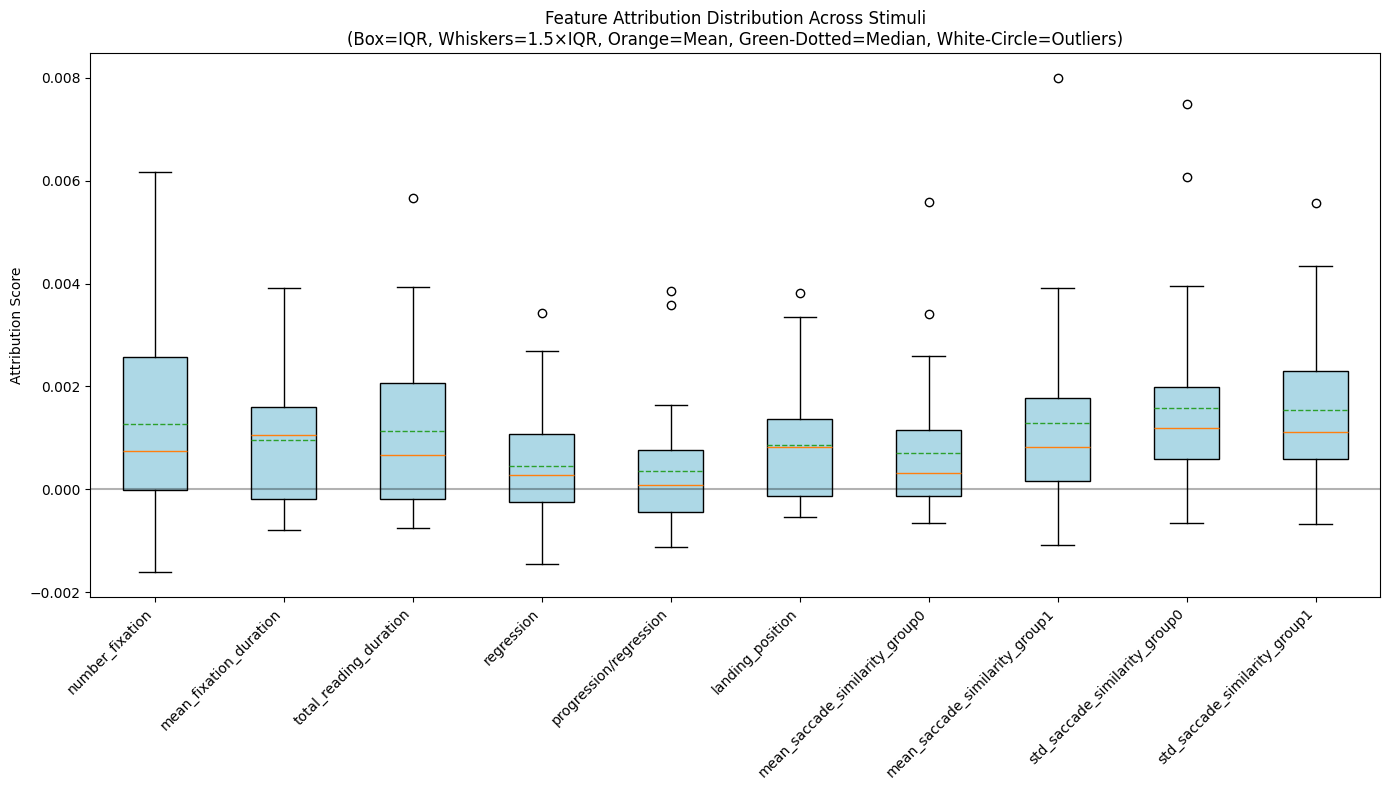


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0013, Std= 0.0018, Min=-0.0016, Max= 0.0062
mean_fixation_duration        : Mean= 0.0010, Std= 0.0012, Min=-0.0008, Max= 0.0039
total_reading_duration        : Mean= 0.0011, Std= 0.0017, Min=-0.0008, Max= 0.0057
regression                    : Mean= 0.0005, Std= 0.0011, Min=-0.0015, Max= 0.0034
progression/regression        : Mean= 0.0004, Std= 0.0011, Min=-0.0011, Max= 0.0038
landing_position              : Mean= 0.0009, Std= 0.0011, Min=-0.0005, Max= 0.0038
mean_saccade_similarity_group0: Mean= 0.0007, Std= 0.0013, Min=-0.0007, Max= 0.0056
mean_saccade_similarity_group1: Mean= 0.0013, Std= 0.0018, Min=-0.0011, Max= 0.0080
std_saccade_similarity_group0 : Mean= 0.0016, Std= 0.0018, Min=-0.0007, Max= 0.0075
std_saccade_similarity_group1 : Mean= 0.0015, Std= 0.0014, Min=-0.0007, Max= 0.0056


In [97]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All features

In [98]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [99]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7302117347717285
Epoch 5 loss: 0.39367738366127014
Epoch 10 loss: 0.34582892060279846
Epoch 15 loss: 0.3206879794597626
Epoch 0 loss: 0.6179613471031189
Epoch 5 loss: 0.3632582724094391
Epoch 10 loss: 0.3323444724082947
Epoch 15 loss: 0.3226183354854584
Epoch 0 loss: 0.6921526193618774
Epoch 5 loss: 0.38369399309158325
Epoch 10 loss: 0.34811678528785706
Epoch 15 loss: 0.33645036816596985
Epoch 0 loss: 0.6558589339256287
Epoch 5 loss: 0.37187957763671875
Epoch 10 loss: 0.32286641001701355
Epoch 15 loss: 0.3143055737018585
Epoch 0 loss: 0.768651008605957
Epoch 5 loss: 0.38144320249557495
Epoch 10 loss: 0.3333309292793274
Epoch 15 loss: 0.3280515968799591
Epoch 0 loss: 0.7582199573516846
Epoch 5 loss: 0.3819289803504944
Epoch 10 loss: 0.3291359543800354
Epoch 15 loss: 0.31776362657546997
Epoch 0 loss: 0.709500789642334
Epoch 5 loss: 0.39334020018577576
Epoch 10 loss: 0.345615029335022
Epoch 15 loss: 0.3403511643409729
Epoch 0 loss: 0.8120123147964478
Epo

In [100]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7302117347717285
Epoch 5 loss: 0.41263988614082336
Epoch 10 loss: 0.3559459149837494
Epoch 15 loss: 0.3427528142929077
Epoch 0 loss: 0.6179613471031189
Epoch 5 loss: 0.3856271207332611
Epoch 10 loss: 0.34727731347084045
Epoch 15 loss: 0.3348945379257202
Epoch 0 loss: 0.6921526193618774
Epoch 5 loss: 0.3997884690761566
Epoch 10 loss: 0.34957125782966614
Epoch 15 loss: 0.3256712853908539
Epoch 0 loss: 0.6558589339256287
Epoch 5 loss: 0.3952246606349945
Epoch 10 loss: 0.3317910134792328
Epoch 15 loss: 0.3233570456504822
Epoch 0 loss: 0.768651008605957
Epoch 5 loss: 0.3991035521030426
Epoch 10 loss: 0.3436643183231354
Epoch 15 loss: 0.34079495072364807
Epoch 0 loss: 0.7582199573516846
Epoch 5 loss: 0.41210582852363586
Epoch 10 loss: 0.33717381954193115
Epoch 15 loss: 0.3345862627029419
Epoch 0 loss: 0.709500789642334
Epoch 5 loss: 0.4159485995769501
Epoch 10 loss: 0.35493531823158264
Epoch 15 loss: 0.3262028992176056
Epoch 0 loss: 0.8120123147964478
Epoch

Approximation Error: 0.00011982178693870082 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_42272\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


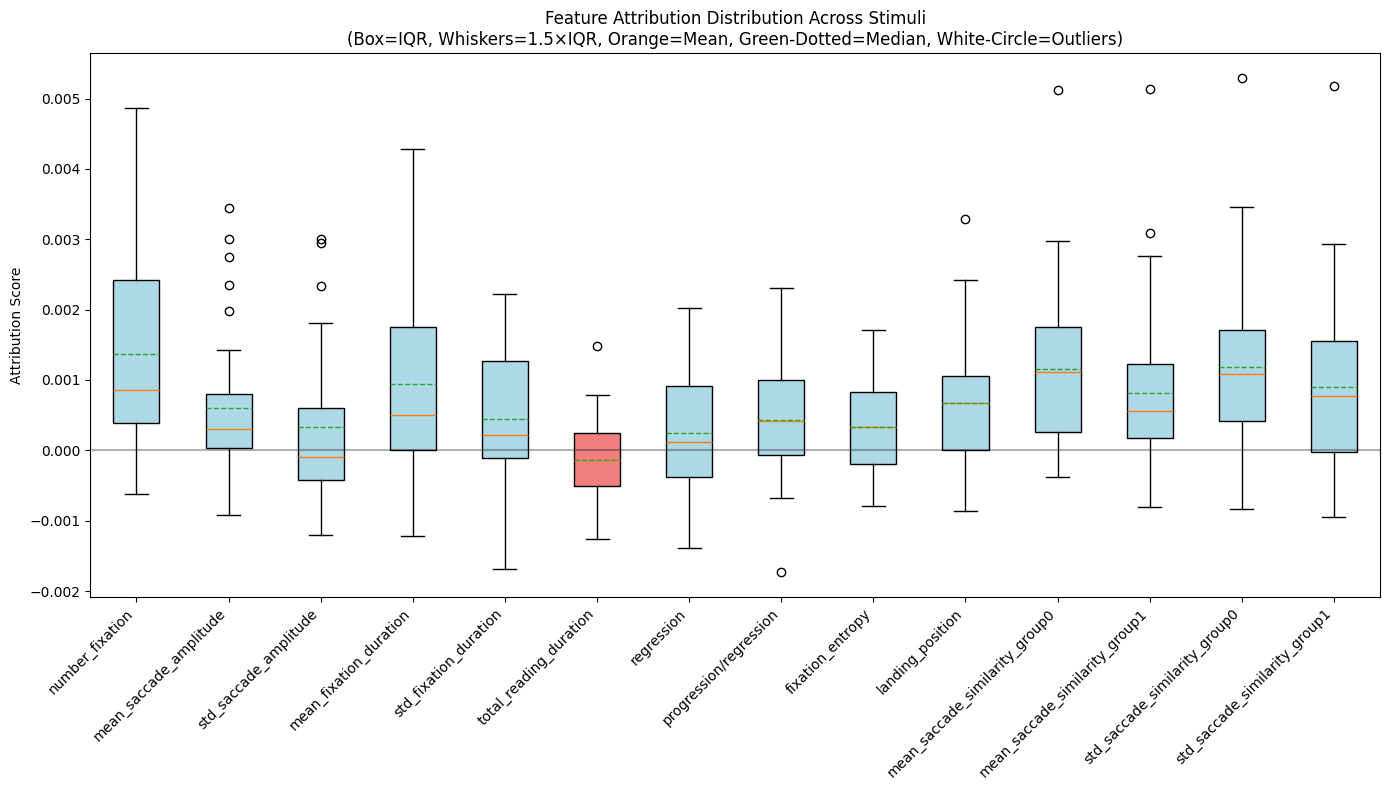


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0014, Std= 0.0014, Min=-0.0006, Max= 0.0049
mean_saccade_amplitude        : Mean= 0.0006, Std= 0.0011, Min=-0.0009, Max= 0.0035
std_saccade_amplitude         : Mean= 0.0003, Std= 0.0011, Min=-0.0012, Max= 0.0030
mean_fixation_duration        : Mean= 0.0009, Std= 0.0013, Min=-0.0012, Max= 0.0043
std_fixation_duration         : Mean= 0.0004, Std= 0.0010, Min=-0.0017, Max= 0.0022
total_reading_duration        : Mean=-0.0001, Std= 0.0006, Min=-0.0013, Max= 0.0015
regression                    : Mean= 0.0002, Std= 0.0008, Min=-0.0014, Max= 0.0020
progression/regression        : Mean= 0.0004, Std= 0.0008, Min=-0.0017, Max= 0.0023
fixation_entropy              : Mean= 0.0003, Std= 0.0006, Min=-0.0008, Max= 0.0017
landing_position              : Mean= 0.0007, Std= 0.0010, Min=-0.0009, Max= 0.0033
mean_saccade_similarity_group0: Mean= 0.0011, Std= 0.0012, Min=-0.000

In [101]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [102]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [103]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.6771072149276733
Epoch 5 loss: 0.4959372580051422
Epoch 10 loss: 0.40471136569976807
Epoch 15 loss: 0.3726308047771454
Epoch 0 loss: 0.7817206382751465
Epoch 5 loss: 0.49806275963783264
Epoch 10 loss: 0.3977830708026886
Epoch 15 loss: 0.36416834592819214
Epoch 0 loss: 0.7303671836853027
Epoch 5 loss: 0.4552578330039978
Epoch 10 loss: 0.4138825535774231
Epoch 15 loss: 0.36327946186065674
Epoch 0 loss: 0.7235403060913086
Epoch 5 loss: 0.4407334327697754
Epoch 10 loss: 0.3853386640548706
Epoch 15 loss: 0.3503219187259674
Epoch 0 loss: 0.6616967916488647
Epoch 5 loss: 0.45449623465538025
Epoch 10 loss: 0.3919045627117157
Epoch 15 loss: 0.3682996928691864
Epoch 0 loss: 0.7392351031303406
Epoch 5 loss: 0.4642230272293091
Epoch 10 loss: 0.390494167804718
Epoch 15 loss: 0.3666638135910034
Epoch 0 loss: 0.8129568099975586
Epoch 5 loss: 0.4562743306159973
Epoch 10 loss: 0.3936542570590973
Epoch 15 loss: 0.358182817697525
Epoch 0 loss: 0.8090099692344666
Epoch 5